## 《NetworkX编程实践基础》05课：度、平均度以及度分布

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常

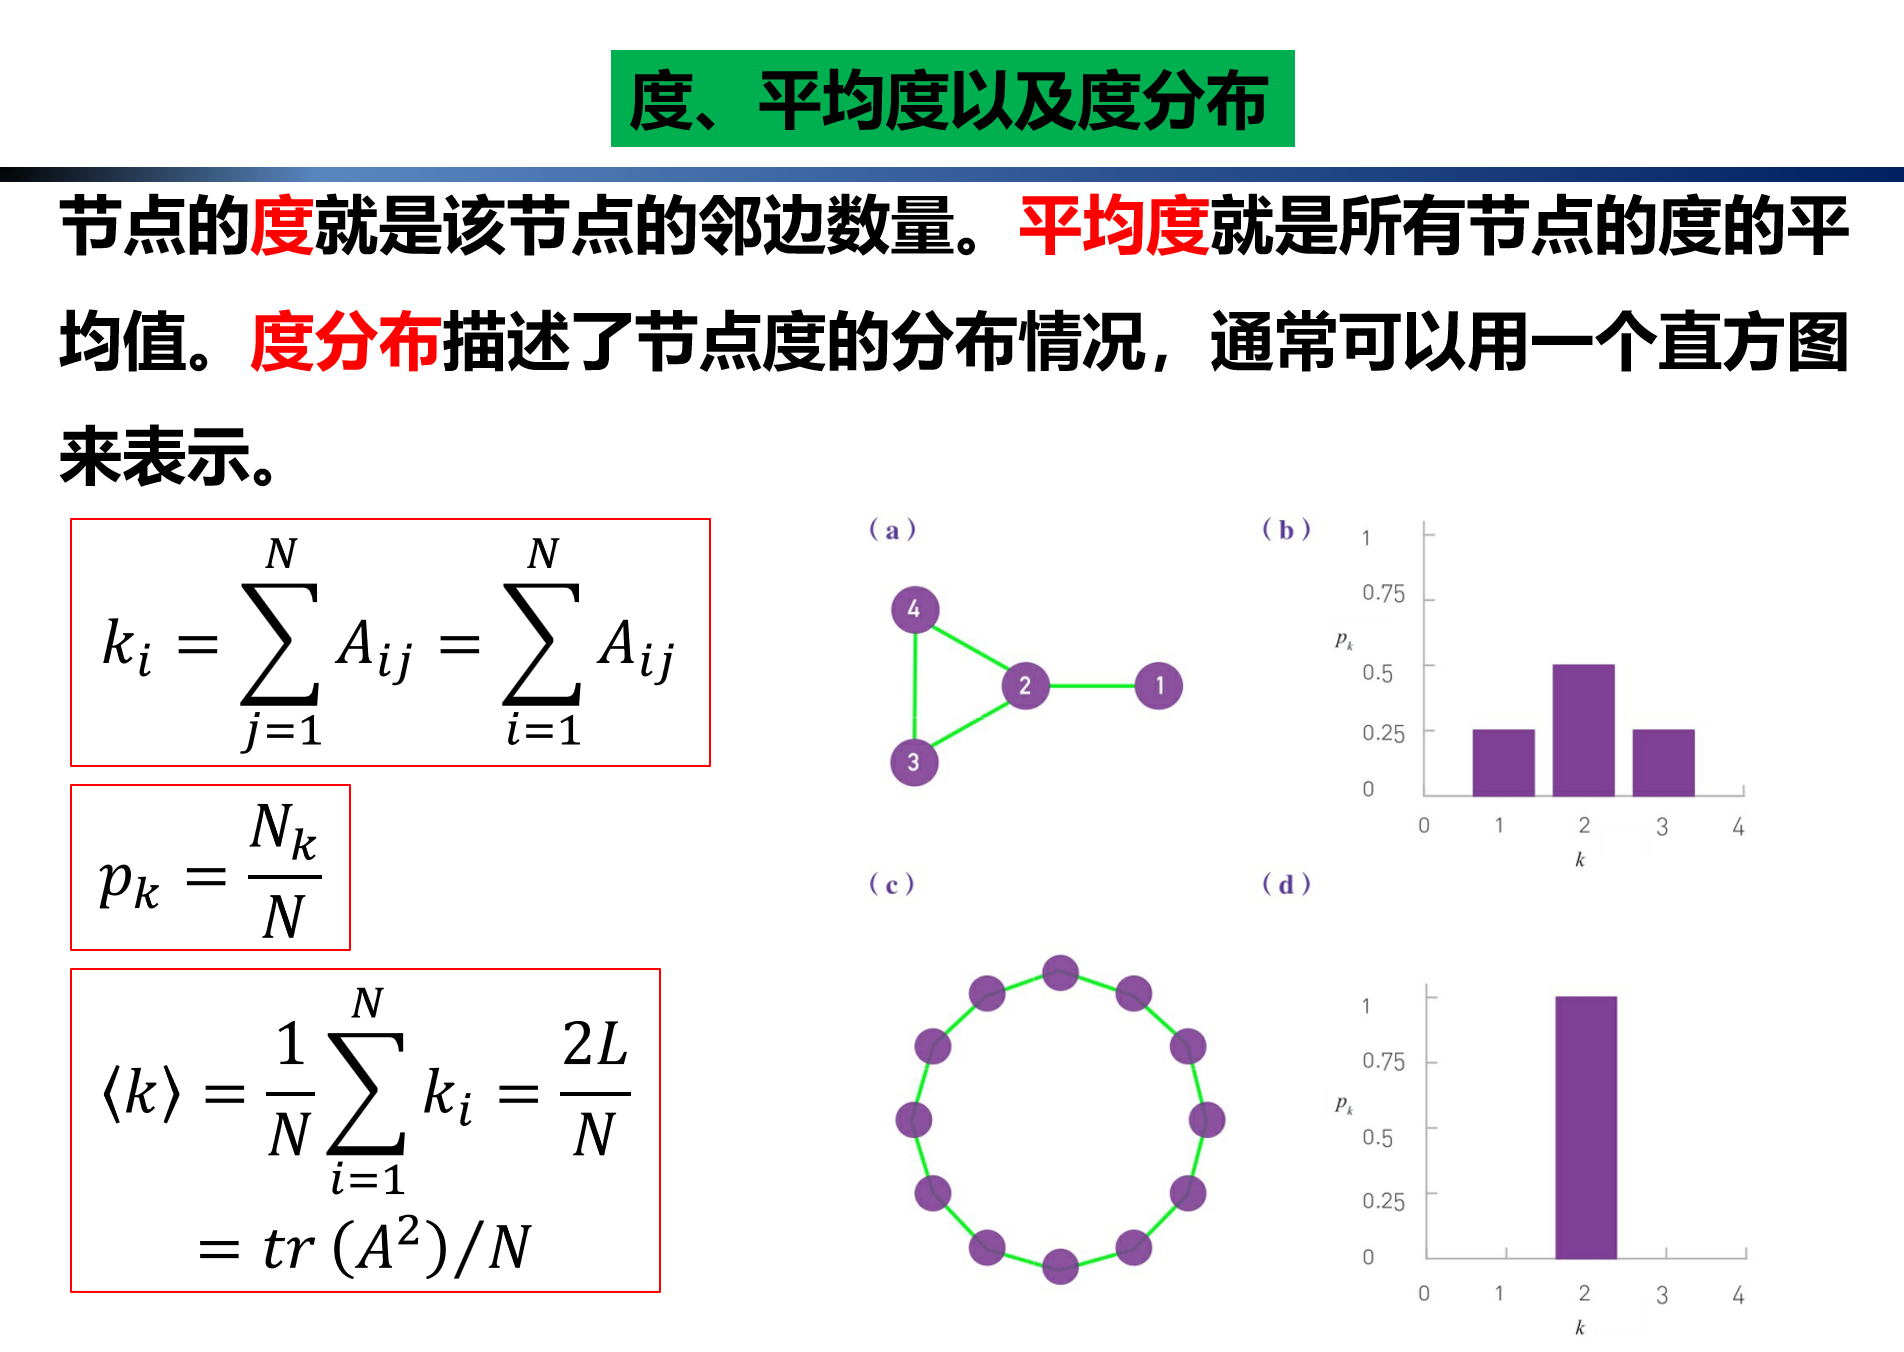

In [2]:
### 知识点回顾
from IPython.display import Image
Image(filename = './4.png', width=60, height=40)

In [3]:
import networkx as nx
import numpy as np

### 1、无向无权网络

In [4]:
# 创建空图
G = nx.Graph()
# 添加节点
G.add_nodes_from([1,2,3,4])
# 添加边
G.add_edges_from([(1,2),(2,3),(2,4),(3,4)])

In [6]:
# 获取网络G的度
d = dict(nx.degree(G))
print(d)
# 获取网络G的平均度
print("平均度为：", 2*len(G.edges())/len(G.nodes))
# 或采用如下方式
print("平均度为：", sum(d.values())/len(G.nodes))

# 获取度值出现的频数：返回所有位于区间[0, dmax]的度值的频率列表
nx.degree_histogram(G)

{1: 1, 2: 3, 3: 2, 4: 2}
平均度为： 2.0
平均度为： 2.0


[0, 1, 2, 1]

### 绘制度分布直方图

In [7]:
# 导入绘图库
import matplotlib.pyplot as plt

[0, 1, 2, 3]
[0.0, 0.25, 0.5, 0.25]


(0.0, 4.0)

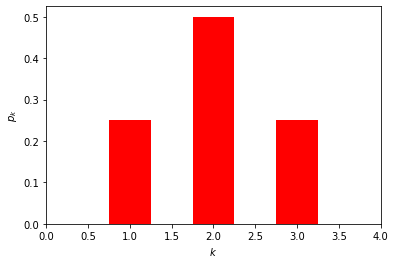

In [8]:
x = list(range(max(d.values())+1))
y = [i/len(G.nodes) for i in nx.degree_histogram(G)]
print(x)
print(y)

plt.bar(x, y, width=0.5, color="red")
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.xlim([0,4])

### 2、无向加权网络

In [10]:
# 创建加权网络
WG = nx.Graph()
WG.add_weighted_edges_from([(0, 1, 3.0), (1, 2, 7.5), (0, 2, 1.5)])

# 获取网络G的度
wd = dict(nx.degree(WG, weight='weight'))
print(wd)
# 获取网络WG的平均加权度
print("平均加权度为：", sum(wd.values())/len(G.nodes))

{0: 4.5, 1: 10.5, 2: 9.0}
平均加权度为： 6.0


### 3、有向网络

所有节点的入度为： {1: 0, 2: 1, 3: 3, 4: 1}
所有节点的出度为： {1: 2, 2: 1, 3: 1, 4: 1}


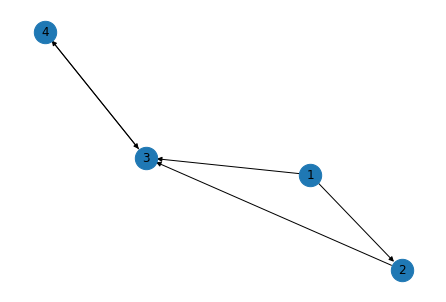

In [18]:
DG = nx.DiGraph()
# 添加节点
DG.add_nodes_from([1,2,3,4])
# 添加边
DG.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,3)])
nx.draw(DG, node_size=500, with_labels=True)

print("所有节点的入度为：", dict(DG.in_degree()))
print("所有节点的出度为：", dict(DG.out_degree()))

{1: 0, 2: 1, 3: 3, 4: 1}
[0, 1, 2, 3]
[1 2 0 1]


(-1.0, 4.0)

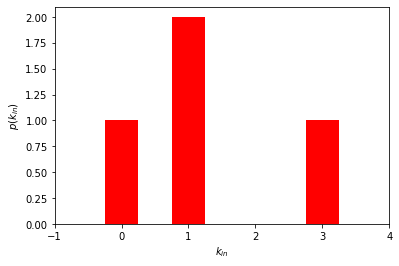

In [24]:
### 分别绘制入度和出度分布
di = dict(DG.in_degree())
print(di)
xi = list(range(max(di.values())+1))
yi = np.bincount(list(di.values()))
print(xi)
print(yi)

# 绘制入度频数分布直方图
plt.bar(xi, yi, width=0.5, color="red")
plt.xlabel("$k_{in}$")
plt.ylabel("$p(k_{in})$")
plt.xlim([-1,4])

# 出度分布与之类似